<a href="https://colab.research.google.com/github/Joshua-Lemus/machine_learning/blob/master/Proyecto_ML_ordenado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load packages**

In [ ]:
!pip install category_encoders

In [ ]:
# Numerical python and friends
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Machine learning packages
import category_encoders as ce # For encoding xd
from sklearn.preprocessing import LabelEncoder #
from sklearn.utils import check_random_state #For generating random permutations (?)
from sklearn.model_selection import train_test_split #
from sklearn import linear_model, metrics #
from sklearn.metrics import accuracy_score #

# Misc packages
from datetime import datetime # Modulo que permite trabajar con fechas

In [ ]:
random_seed = 0

# **Load and clean data**

## Load data

In [ ]:
# Load the data and some data visualization
df = pd.read_csv("/content/SB11_20221.csv")
print("Column values (before cleaning data):\n")
for column in df.columns:
  print(column, ':', set(df[column]))

df.head()


Column values (before cleaning data):

Unnamed: 0 : {262145, 4, 7, 8, 9, 262158, 17, 262162, 262161, 21, 262165, 262167, 29, 262179, 36, 262183, 43, 44, 47, 262191, 53, 55, 262201, 58, 63, 262208, 67, 262215, 73, 262218, 74, 80, 81, 262229, 262230, 262231, 262237, 262239, 262240, 101, 262246, 103, 262249, 262250, 262252, 108, 262254, 262253, 113, 262258, 115, 262261, 119, 121, 127, 262274, 132, 133, 262281, 262283, 140, 149, 150, 262296, 155, 162, 262308, 165, 262310, 170, 262314, 262316, 262318, 174, 176, 262321, 183, 188, 191, 262336, 193, 262338, 203, 207, 262351, 262354, 262355, 212, 262357, 262359, 217, 262362, 221, 262366, 262371, 262373, 230, 229, 262376, 233, 262379, 262383, 241, 242, 262387, 262388, 245, 262389, 262393, 262396, 254, 262401, 262403, 260, 261, 262405, 262407, 264, 262406, 263, 262411, 262412, 277, 282, 284, 262430, 262434, 262439, 295, 262440, 262449, 306, 262457, 315, 316, 317, 321, 262466, 323, 324, 262468, 333, 262478, 335, 262490, 262491, 354, 356, 359, 2625

,Unnamed: 0,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_GLOBAL,ESTU_GENERACION-E
0,453241,M,27/04/2002,No,CUNDINAMARCA,Estrato 3,No sabe,No sabe,Si,Si,OFICIAL,URBANO,MAÑANA,267,NO
1,387781,M,19/05/2005,Si,VALLE,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Si,Si,OFICIAL,URBANO,MAÑANA,282,NO
2,77011,F,07/08/2002,Si,NARIÑO,Estrato 1,Educación profesional completa,Secundaria (Bachillerato) completa,Si,No,OFICIAL,URBANO,MAÑANA,226,GENERACION E - GRATUIDAD
3,135370,M,03/10/2001,Si,BOGOTÁ,Estrato 2,Postgrado,Técnica o tecnológica completa,Si,Si,OFICIAL,URBANO,MAÑANA,237,NO
4,31081,M,21/08/2002,No,ANTIOQUIA,Estrato 2,Educación profesional incompleta,Primaria incompleta,Si,Si,OFICIAL,URBANO,MAÑANA,229,NO


## Clean data

In [ ]:
# Cleaning data
# clean_df will contain the "clean" data
# Rename columns
clean_df = df.rename(columns={'Unnamed: 0': 'Code',
                          'ESTU_GENERO': 'Sex',
                          'ESTU_FECHANACIMIENTO': 'Birthdate',
                          'ESTU_TIENEETNIA': 'Ethnics',
                          'ESTU_DEPTO_RESIDE': 'Department',
                          'FAMI_ESTRATOVIVIENDA': 'Stratum',
                          'FAMI_EDUCACIONPADRE': 'FatherEduaction',
                          'FAMI_EDUCACIONMADRE': 'MotherEduaction',
                          'FAMI_TIENEINTERNET': 'HasInternet',
                          'FAMI_TIENECOMPUTADOR': 'HasComputer',
                          'COLE_NATURALEZA': 'SchoolType',
                          'COLE_AREA_UBICACION': 'SchoolPlace',
                          'COLE_JORNADA': 'SchoolShift',
                          'PUNT_GLOBAL': 'Score',
                          'ESTU_GENERACION-E': 'ScholarshipType'},
                         inplace=False)

# Remove nan values
print(">>>>> Null entries per column (to be dropped)")
print(df.isnull().sum())
clean_df = clean_df.dropna(axis='index', how='any')
percentage_removed = (len(df.index) - len(clean_df.index))/len(df.index)*100
print(f'\n>>>>> Removed {percentage_removed}% of rows for having nan data\n')

# Purge data by age
# strptime es un método que permite convertir un string a fecha de acuerdo a un formato
def edad(x):
    birth = datetime.strptime(x, '%d/%m/%Y') # Fecha nacimiento
    prueba = datetime.strptime('09/08/2020', '%d/%m/%Y') #Fecha presentación examen
    return prueba.year - birth.year # Edad el día de presentación del examen
clean_df['Age'] = clean_df['Birthdate'].apply(lambda x: edad(x))
# Creamos una copia cleand_df2, eliminamos edades menores a 14 y superiores a 81
pre_purge_length=len(clean_df)
clean_df = clean_df.loc[(clean_df['Age'] >= 14) & (clean_df['Age']<81)]
post_purge_length=len(clean_df)
age_removed = (post_purge_length-post_purge_length)#/pre_purge_length*100
print(f'\n>>>>> Further removed {age_removed} lines for having nonsensical age\n')

# Visualize the clean data
clean_df.head()

>>>>> Null entries per column (to be dropped)
Unnamed: 0                 0
ESTU_GENERO                2
ESTU_FECHANACIMIENTO       0
ESTU_TIENEETNIA          611
ESTU_DEPTO_RESIDE          0
FAMI_ESTRATOVIVIENDA    3398
FAMI_EDUCACIONPADRE     2601
FAMI_EDUCACIONMADRE     2707
FAMI_TIENEINTERNET      2700
FAMI_TIENECOMPUTADOR    4046
COLE_NATURALEZA            0
COLE_AREA_UBICACION        0
COLE_JORNADA               0
PUNT_GLOBAL                0
ESTU_GENERACION-E          0
dtype: int64

>>>>> Removed 6.001544952165904% of rows for having nan data


>>>>> Further removed 0 lines for having nonsensical age



,Code,Sex,Birthdate,Ethnics,Department,Stratum,FatherEduaction,MotherEduaction,HasInternet,HasComputer,SchoolType,SchoolPlace,SchoolShift,Score,ScholarshipType,Age
0,453241,M,27/04/2002,No,CUNDINAMARCA,Estrato 3,No sabe,No sabe,Si,Si,OFICIAL,URBANO,MAÑANA,267,NO,18
1,387781,M,19/05/2005,Si,VALLE,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Si,Si,OFICIAL,URBANO,MAÑANA,282,NO,15
2,77011,F,07/08/2002,Si,NARIÑO,Estrato 1,Educación profesional completa,Secundaria (Bachillerato) completa,Si,No,OFICIAL,URBANO,MAÑANA,226,GENERACION E - GRATUIDAD,18
3,135370,M,03/10/2001,Si,BOGOTÁ,Estrato 2,Postgrado,Técnica o tecnológica completa,Si,Si,OFICIAL,URBANO,MAÑANA,237,NO,19
4,31081,M,21/08/2002,No,ANTIOQUIA,Estrato 2,Educación profesional incompleta,Primaria incompleta,Si,Si,OFICIAL,URBANO,MAÑANA,229,NO,18


## *Encode categorical features*

In [ ]:
# Encode categorical data
# Variables to encode
Vars = ['Sex', 'Department', 'Stratum', 'MotherEduaction', 'HasInternet', 'HasComputer', 'SchoolType', 'SchoolPlace', 'SchoolShift']
# The encoder we'll use
ce_be = ce.BinaryEncoder(cols=Vars)

# transform the data
data_binary = ce_be.fit_transform(clean_df)
# Add a column of ones (for learning a bias)
data_binary['ones'] = 1

# Visualize data
data_binary.head()

,Code,Sex_0,Sex_1,Birthdate,Ethnics,Department_0,Department_1,Department_2,Department_3,Department_4,...,SchoolType_1,SchoolPlace_0,SchoolPlace_1,SchoolShift_0,SchoolShift_1,SchoolShift_2,Score,ScholarshipType,Age,ones
0,453241,0,1,27/04/2002,No,0,0,0,0,0,...,1,0,1,0,0,1,267,NO,18,1
1,387781,0,1,19/05/2005,Si,0,0,0,0,1,...,1,0,1,0,0,1,282,NO,15,1
2,77011,1,0,07/08/2002,Si,0,0,0,0,1,...,1,0,1,0,0,1,226,GENERACION E - GRATUIDAD,18,1
3,135370,0,1,03/10/2001,Si,0,0,0,1,0,...,1,0,1,0,0,1,237,NO,19,1
4,31081,0,1,21/08/2002,No,0,0,0,1,0,...,1,0,1,0,0,1,229,NO,18,1


# **The actual Machine learning stuff**

## Separate training and test data

In [ ]:
# Separate features (X) and labels (Y)
# The variables to consider
BinaryVars = ['ones', 'Sex_0', 'Sex_1', 'Department_0', 'Department_1', 'Department_2', 'Department_3', 'Department_4', 'Department_5',
              'Stratum_0', 'Stratum_1', 'Stratum_2', 'MotherEduaction_0', 'MotherEduaction_1', 'MotherEduaction_2', 'MotherEduaction_3',
              'HasInternet_0', 'HasInternet_1', 'HasComputer_0', 'HasComputer_1', 'SchoolType_0', 'SchoolType_1',
              'SchoolPlace_0', 'SchoolPlace_1', 'SchoolShift_0', 'SchoolShift_1', 'SchoolShift_2']
X_data = data_binary[BinaryVars]
Y_data = data_binary['Score']
# Normalize score
Y_data = Y_data/max(Y_data)

# Shuffle data
random_state = check_random_state(random_seed)
permutation = random_state.permutation(len(data_binary))
X = X_data.iloc[permutation]
Y = Y_data.iloc[permutation]
# Check no error is made in the shuffling
if len(X) != len(data_binary):
  print("data shuffle is different than data length")

# Define size for training and test
train_size = math.floor(len(data_binary)*0.9)
test_size = len(data_binary)-train_size
# Separate training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=train_size,test_size=test_size)

# Visualize training data features
X_train.head()

,ones,Sex_0,Sex_1,Department_0,Department_1,Department_2,Department_3,Department_4,Department_5,Stratum_0,...,HasInternet_1,HasComputer_0,HasComputer_1,SchoolType_0,SchoolType_1,SchoolPlace_0,SchoolPlace_1,SchoolShift_0,SchoolShift_1,SchoolShift_2
60118,1,0,1,0,0,1,0,1,0,1,...,0,1,0,0,1,1,0,0,0,1
45827,1,1,0,0,0,0,1,0,1,0,...,1,0,1,0,1,0,1,1,1,0
22729,1,1,0,0,0,0,0,1,0,0,...,1,0,1,0,1,1,0,0,0,1
94350,1,0,1,0,0,0,1,0,1,0,...,1,1,0,0,1,0,1,0,1,0
57067,1,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1


## *Categorize labels*

Text(0, 0.5, 'Frequency')

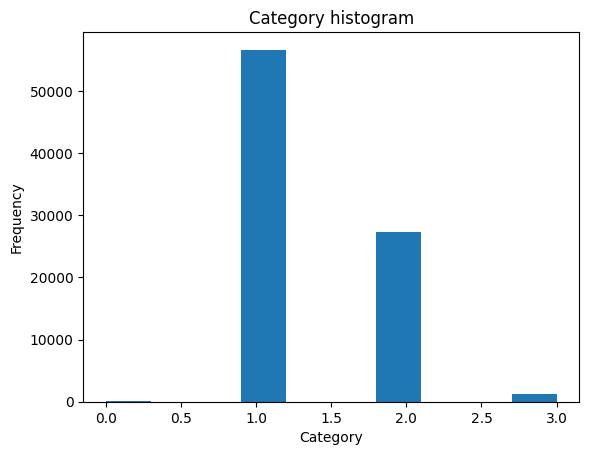

In [ ]:
# Categorize data
score_limits = [0, 150/500, 270/500, 359/500, 500/500]
score_labels = [0, 1, 2, 3]

Y_train_categorized = pd.cut(Y_train, bins=score_limits, labels=score_labels, right=False)
Y_test_categorized = pd.cut(Y_test, bins=score_limits, labels=score_labels, right=False)

plt.hist(Y_train_categorized)
plt.title('Category histogram')
plt.xlabel('Category')
plt.ylabel('Frequency')

## Linear regression

In [ ]:
# Functions for the linear optimization

def LinearOptimization(X, Y, print_theta=False, regularization='Linear', lam=1.0):
  ''' Returns a fitted linear regression model
  (dtype: sklearn.linear_model._base.LinearRegression)'''
  # Define a regression model
  if regularization=='Linear':
    reg = linear_model.LinearRegression()
  elif regularization=='Ridge':
    reg = linear_model.Ridge(lam)
  elif regularization=='LASSO':
    reg = linear_model.Lasso(lam)
  else:
    raise ValueError('Regularizacion no valida, valores validos: "Linear", "Ridge" o "LASSO"')

  # Fit the data
  reg.fit(X, Y)

  # Print the obtained parameters
  if print_theta:
    print('Coefficients (theta): ', reg.coef_)

  # Return the model
  return reg

def Test_error(Xtest, Ytest, reg, print_error=False):
  # Evaluate the model on our test data
  score = reg.score(Xtest, Ytest)

  return score


In [ ]:
# Do the regularization

#-------------------------------------------------------------------------------
regularizationtype='Linear'
### Training using the X raw data
raw_f = LinearOptimization(X_train, Y_train, print_theta=False, regularization=regularizationtype)
raw_score = Test_error(X_test, Y_test, raw_f, print_error=False)
print("Raw score: ", raw_score)

#-------------------------------------------------------------------------------
### Training using shifted X data (from {0,1} to {-1,1})
# Shift the data
X_train_shifted = 2*X_train-1
X_test_shifted = 2*X_test-1

# Train
shifted_f = LinearOptimization(X_train_shifted, Y_train, print_theta=False, regularization=regularizationtype)
shifted_score = Test_error(X_test_shifted, Y_test, shifted_f, print_error=False)
print("Shifted score: ", shifted_score)

#-------------------------------------------------------------------------------
### Training using a randomly enhanced dataset (in range [0,1])
A = np.random.rand(len(X_train_shifted.columns), 500)
X_tilde_train = np.dot(X_train, A)
X_tilde_test = np.dot(X_test, A)
#X_tilde_train.shape

# Train
enhanced_f = LinearOptimization(X_tilde_train, Y_train, print_theta=False, regularization=regularizationtype)
enhanced_score = Test_error(X_tilde_test, Y_test, enhanced_f, print_error=False)
print("Enhanced dimension score: ", enhanced_score)

#-------------------------------------------------------------------------------
# Training using a randomly enhanced dataset (in range [-1,1])


Raw score:  0.21099637139675964
Shifted score:  0.21099621119284384
Enhanced dimension score:  0.21088820087849602


## Softmax regression

In [ ]:
# Initialize weights randomly
num_features = X_train.shape[1]
num_classes = len(Y_train_categorized.cat.categories)
weights = np.random.randn(num_features, num_classes)

# Training parameters
learning_rate = 0.1
num_epochs = 1
minibatch_size = 100
num_batches = math.floor(len(Y_train_categorized)/minibatch_size)

# Training loop
for epoch in range(num_epochs):
  for k in range(num_batches):
    # separate minibatches
    random_state = check_random_state(random_seed)
    permut = random_state.permutation(len(Y_train_categorized))
    X_k = X_train.iloc[permut]
    Y_k = Y_train_categorized.iloc[permut]

    # Compute logits (linear combinations)
    logits = X_k.dot(weights) # w = x^T \cdot theta

    # Apply softmax function to logits
    exp_logits = np.exp(-1.0*logits) # e^{-w}
    softmax_probs = exp_logits / np.sum(exp_logits, axis=1)#, keepdims=True) # e^{-w}/(\sum_w e^{-w})

    # Compute gradient of cross-entropy loss with respect to weights
    gradients = X_k.T.dot(softmax_probs - np.eye(num_classes)[Y_k])

    # Update weights
    weights -= learning_rate * gradients

    print(f'Finished epoch {epoch}')

# Predictions
test_logits = X_test.dot(weights)
test_softmax_probs = np.exp(test_logits) / np.sum(np.exp(test_logits), axis=1, keepdims=True)
y_pred = np.argmax(test_softmax_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_test_categorized, y_pred)
print(f"Accuracy: {accuracy:.2f}")

## Multi-layer Perceptron classifier

## Random Forest Classifier